<a href="https://colab.research.google.com/github/Manojpatil123/Assignments/blob/main/Assignment_Solution_Hypothesis_Testing_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
from scipy.stats import *
import math

In [ ]:
#helper functions 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

In [ ]:
variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)

In [ ]:
findz = findz()

In [ ]:
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

In [ ]:
zcdf = lambda x: norm(0,1).cdf(x)

In [ ]:
def p_value(z,tailed):
  z=zcdf(z)
  if tailed=='l':
    return z
  elif tailed == 'r':
    return 1-z
  elif tailed == 'd':
    if z>0.5:
      return 2*(1-z)
    else:
      return 2*z
  else:
    return np.nan

# <b> Write the steps and conclusions in the text cells. Use Python to calculate the probabilities. </b> 

# <b><u> Problem 1 </u> </b>

## <b>The average IQ of a sample of 50 university students was found to be 105. Carry out a statistical test to determine whether the average IQ of university students is greater than 100, assuming that IQs are normally distributed. It is known from previous studies that the standard deviation of IQs among students is approximately 20. </b>

values given : <br>


*   Sample mean = 105
*   Sample Size = 50
* Sampple stdev = 20
* Hypothesis mean = 100
* p>100
* Right Tailed


1. Null Hypothesis : p=100
2. Alternate Hypotesis : p>100
3. Critical Value : alpha = 0.05 :: p < 0.05
4. Identify p value
5. Conclusion


In [ ]:
hypothesis_mean = 100
sample_mean = 105
std = 20
size = 50

In [ ]:
z = findz.mean(hypothesis_mean,sample_mean,size,std)

In [ ]:
p = p_value(z,'r') #right tailed test

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


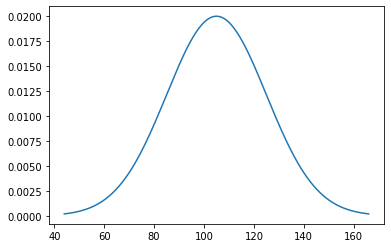

In [ ]:
x = np.linspace(44,166,200)
y = norm.pdf(x,105,20)
sns.lineplot(x,y)

In [ ]:
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0385499358717708


In [ ]:
del hypothesis_mean,sample_mean,std,size,z,p

# <b><u> Problem 2 </u> </b>

## <b>Carry out a statistical test to assess whether the standard deviation of the heights of 10- year-old children is equal to 3cm, based on the random sample of 5 heights in cm given below. Assume that heights are normally distributed. 

## 124, 122, 130, 125, 132 </b>

values given : <br>


*   Sample 
*   Sample Size = 5
* Hypothesis Stdev = 3
*  Double Tailed



1. Null Hypothesis : stdev = 3
2. Alternate Hypotesis : stdev not = 9
3. Critical Value : alpha = 0.05 :: p < 0.05
4. Identify p value
5. Conclusion


In [ ]:
sample = [124, 122, 130, 125, 132]
hypothetical_std  = 3
hypothetical_variance = hypothetical_std**2
sample_variance = variance(sample)

In [ ]:
z = findz.varience( hypothetical_variance,sample_variance,len(sample))

In [ ]:
p = 2*(1-chi2.cdf(z,len(sample)-1)) #double tailed

In [ ]:
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.18977823109367087.


In [ ]:
del hypothetical_variance,sample_variance,p,z,sample,hypothetical_std

# <b><u> Problem 3 </u> </b>

## <b>In a one-year mortality investigation, 45 of the 250 ninety-year-olds present at the start of the investigation died before the end of the year. Assuming that the number of deaths has a Bin(250,q) distribution, test whether this result is consistent with a mortality rate of q = 0.2 for this age. </b>

values given : <br>


*   theta = 45/250
*   Sample Size = 250
*  theta_h = 0.2
*  Double Tailed



1. Null Hypothesis : theta = 0.2
2. Alternate Hypotesis : theta not = 0.2
3. Critical Value : alpha = 0.05 :: p < 0.05
4. Identify p value
5. Conclusion

In [ ]:
size = 250
theta_hypothesis = 0.2
theta_population = 45/250

In [ ]:
z = findz.proportion(theta_population,theta_hypothesis,size)

In [ ]:
p = p_value(z,'d') #double tailed

In [ ]:
print(conclusion(p))

Failed to reject the Null Hypothesis for p = 0.4291953004403488.


In [ ]:
del size,theta_hypothesis,theta_population,z,p

# <b><u> Problem 4 </u> </b>

## <b>A new gene has been identified that makes carriers particularly susceptible to a particular degenerative disease. In a random sample of 250 adult males born in the UK, 8 were found to be carriers of the disease. Test whether the proportion of adult males born in the UK carrying the gene is less than 10%. </b>



values given : <br>


*   theta = 8/250
*   Sample Size = 250
*  theta_h = 0.1
*  Left Tailed



1. Null Hypothesis : theta = 0.1
2. Alternate Hypotesis : theta not < 0.1
3. Critical Value : alpha = 0.05 :: p < 0.05
4. Identify p value
5. Conclusion

In [ ]:
p_hyp = 0.1
p_sample = 8/250
size = 250

In [ ]:
z = findz.proportion(p_sample,p_hyp,size)

In [ ]:
p = p_value(z,'l') #left tailed

In [ ]:
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.00016924134515806854


In [ ]:
del p_hyp,p_sample,size,z,p